# 積み上げ棒グラフを作成する

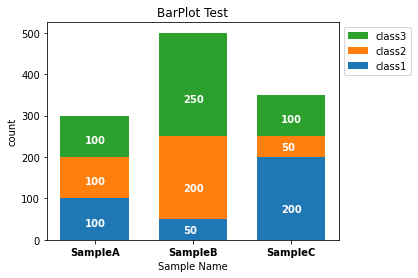

In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np

#数値は適当
bar1 = [100, 50, 200] #積み上げ棒グラフの一段目
bar2 = [100, 200, 50] #積み上げ棒グラフの二段目
bar3 = [100, 250, 100] #積み上げ棒グラフの三段目

bar3_st = np.add(bar1, bar2).tolist() #bar3を積み上げる位置を指定しておく
sample_labels = ['SampleA', 'SampleB', 'SampleC'] #データのラベルを指定
x = [0, 1, 2] #棒グラフを表示させるx軸座標を決めておく
barwidth = 0.7 #棒グラフの幅を指定する。棒グラフのx軸座標を考慮して決める

plt.figure() #Figureオブジェクトを作成
plt.bar(x, bar1, width=barwidth, label='class1')
plt.bar(x, bar2, bottom=bar1, width=barwidth, label='class2') #bottomで2段目のデータを積み上げる位置を指定する
plt.bar(x, bar3, bottom=bar3_st, width=barwidth, label='class3') #bottomで3段目のデータを積み上げる位置を指定する
plt.xticks(x, sample_labels, fontweight='bold') #x軸のラベルを指定する

#データラベルを棒グラフの中に追加したい場合は以下を追加する
ax = plt.gca() #gca()現在の軸情報を取得(get current axis)
handles, labels = ax.get_legend_handles_labels() #handles 線やマーカーを含んだオブジェクト labels 凡例に表示されるラベル
plt.legend(handles[::-1], labels[::-1], loc='upper left', bbox_to_anchor=(1,1)) #handles[::-1], labels[::-1]　凡例を棒グラフの順番と合わせる

for i in range(len(bar1)):
    ax.annotate(str(bar1[i]), xy=(x[i] - 0.1, (bar1[i] / 3)), color='white', fontweight='bold')
for i in range(len(bar2)):
    ax.annotate(str(bar2[i]), xy=(x[i] - 0.1, (bar2[i] / 3) + bar1[i]), color='white', fontweight='bold')
for i in range(len(bar3)):
    ax.annotate(str(bar3[i]), xy=(x[i] - 0.1, (bar3[i] / 3) + bar3_st[i]), color='white', fontweight='bold')

plt.subplots_adjust(right=0.8) #凡例のために余白を広げる rightのdefaultは0.9
plt.title('BarPlot Test')
plt.xlabel('Sample Name')
plt.ylabel('count')
plt.show()
#plt.savefig('barplot.pdf') #pdfで出力する場合
#plt.savefig('barplot.svg',format='svg') #ベクター画像で出力する場合
plt.close()  

**numpy**モジュール **add( )**

・配列の要素を足し算する。

<br>

**numpy**モジュール **tolist( )**

・Numpy配列をリスト型に変換する。

<br>

**pyplot**モジュール **gca( )**

・現在のAxesオブジェクトを取得する。

<br>

**get_legend_handles_labels( )**

・handlerとlabelを取得する。handlerは線やマーカーを含んだオブジェクト。labelsは凡例に表示されるラベル（リスト型）。

・Axesオブジェクト用

<br>

**annotate(s, xy)**

・xyで指定した位置にsで指定した文字を出力する。

・Axesオブジェクト用

<br>

---
### 積み上げる段が多い場合に対応できるように、for文で処理する  

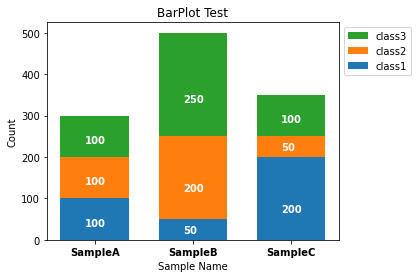

In [2]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np

#数値は適当
bar1 = [100, 50, 200] #積み上げ棒グラフの一段目
bar2 = [100, 200, 50] #積み上げ棒グラフの二段目
bar3 = [100, 250, 100] #積み上げ棒グラフの三段目

bar_data = [bar1, bar2, bar3]

sample_labels = ['SampleA', 'SampleB', 'SampleC'] #データのラベルを指定
group_labels = ['class1', 'class2', 'class3']
x = [0, 1, 2] #棒グラフを表示させるx軸座標を決めておく
barwidth = 0.7 #棒グラフの幅を指定する。棒グラフのx軸座標を考慮して決める

fig, ax = plt.subplots() #FigureオブジェクトとAxesオブジェクトを作成

bottom_position = np.zeros(len(bar_data)) #積み上げる位置を指定するため、積み上げる段数と同じ要素数（ここではbar_dataの要素数）の一次元配列を作成する

for i in range(len(bar_data)): #一段ずつデータをaxオブジェクトに格納する
    ax.bar(x, bar_data[i], width=barwidth, bottom=bottom_position, label=group_labels[i])  
    for j in range(len(bar_data[i])): #annotateはx軸のポイントごとにデータを格納する必要がるので、for文を使う
        ax.annotate(str(bar_data[i][j]), xy=(x[j] - 0.1, (bar_data[i][j] / 3) + bottom_position.tolist()[j]), color='white', fontweight='bold')
    bottom_position = np.add(bar_data[i], bottom_position)

ax.set_xticks(x)
ax.set_xticklabels(sample_labels, fontweight='bold') #x軸のラベルを指定する
handles, labels = ax.get_legend_handles_labels() #handles 線やマーカーを含んだオブジェクト labels 凡例に表示されるラベル
ax.legend(handles[::-1], labels[::-1], loc='upper left', bbox_to_anchor=(1,1)) #handles[::-1], labels[::-1]　凡例を棒グラフの順番と合わせる

fig.subplots_adjust(right=0.8) #凡例のために余白を広げる rightのdefaultは0.9
ax.set_title('BarPlot Test')
ax.set_xlabel('Sample Name')
ax.set_ylabel('Count')
plt.show()
#fig.savefig('barplot.pdf')
#fig.savefig('barplot.svg',format='svg')
plt.close()

**numpy**モジュール **zeros(shape)**

・要素0の配列を生成する。第一引数に配列のshapeを指定できる。